In [1]:
#import Pakete
#plotten:
import matplotlib as mlp
import matplotlib.pyplot as plt
#rechnen:
import numpy as np
#fitten:
import scipy 
from scipy.optimize import curve_fit
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelextrema
import scipy.special as sp
import scipy.constants as sp # für grundlegende Konstanten --> https://docs.scipy.org/doc/scipy/reference/constants.html
#--> eher selbst machen 
#paket für automatische invertierung Funktion --> sehr nützlich
from pynverse import inversefunc
#dateneinlesen einfach
import pylab as py 

# Rechenoperationen

In [2]:
# Bänder InN: 
def Conduction_Band_Energie(k):
    return  E_g + E_np_c * ( ( ( ( (h_quer_eVs * k *100)**2 / (2 * m_e * m_0 * J_zu_eV * E_np_c ) ) + 1/4  )**(1/2)) -1/2 )
    
def light_hole_Band_Energie(k):
    return - E_np_lh * ( ( ( ( (h_quer_eVs * k *100)**2 / (2 * m_lh * m_0 * J_zu_eV * E_np_lh ) ) + 1/4  )**(1/2)) -1/2 )

def heavy_hole_Band_Energie(k):
    return - ((h_quer_eVs * k *100)**2 / (2 * m_hh * m_0 * J_zu_eV ))

#Energie Bänder
def lh_c(k): #light hole
    return Conduction_Band_Energie(k) - light_hole_Band_Energie(k)

def hh_c(k): #heavy hole
    return Conduction_Band_Energie(k) - heavy_hole_Band_Energie(k)

#Energie Laser eV für lamda in nm
def energie_Laser(lamb):
    return h_quer_eVs *2*np.pi * c * (1/ (lamb*(10**-9)))

#Wavevektor aus Energie Laser aus grafen bestimmt 
def Wavevektor_lh_graf(lamb): #wellenvektor light hole
    return inversefunc(lh_c, energie_Laser(lamb))

def Wavevektor_hh_graf(lamb): #wellenvektor heavy hole
    return inversefunc(hh_c, energie_Laser(lamb))

#phononen momentum grafisch
def phononen_momentum_graf_lh(lamb):
    return 2 * Wavevektor_lh_graf(lamb)

def phononen_momentum_graf_hh(lamb):
    return 2 * Wavevektor_hh_graf(lamb)
    

# Konstanten

In [3]:
#Definiton Konstanten für Energie der Bänder
#effektive Massen in m_0
m_e = 0.07 # in m_0
m_lh = 0.035 # in m_0
m_hh = 0.4 # in m_0
#nonparabolic Parameter in eV
E_np_c = 0.4 #eV
E_np_lh = 0.8 #eV
#Bandgab Energie in eV
E_g = 0.63 #eV

# Wellenlänge Laser in nm
lamb = 266
lamb2 = 405

In [4]:
#Definition Komnstanten:
#Elektronenmasse
m_0 = 9.10938*10**-31 #kg

#Plank Konstante in eV*s
h_quer_eVs = 6.58212*10**-16 #eV*s
h_quer_Js = 1.054571817 * 10**-34 #Js

#Lichtgeschwindigkeit
c = 299792458 #m/s

#elementarladung
e = 1.60218 *10**-19 #As

#dielektrische Konstante
eps_0 = 8.85419*10**-18 #A**2 s**4 / (kg cm)**3

# Umrechnung kg zu eV
# da J=kg*m^2/s^2 --> kg = J * s^2/m^2

# Umrechnung J zu eV  bzw kg zu eV
J_zu_eV = 6.24151 *10**18 #eV

# Umrechnung eV zu J
eV_zu_J = 1.60218 *10**-19 #J

#relative massen für e aus Conduction Band und h in lh Band
m_x_e= m_e * m_0 * ( 1 + ((energie_Laser(lamb) - E_g)/ E_np_c) )
m_x_lh= m_lh * m_0 * ( 1 + ((energie_Laser(lamb) - E_g)/ E_np_lh) )

# relative effektive Masse
mu = (m_x_e * m_x_lh)/(m_x_e + m_x_lh)

# Bänder und Wellenzahlen

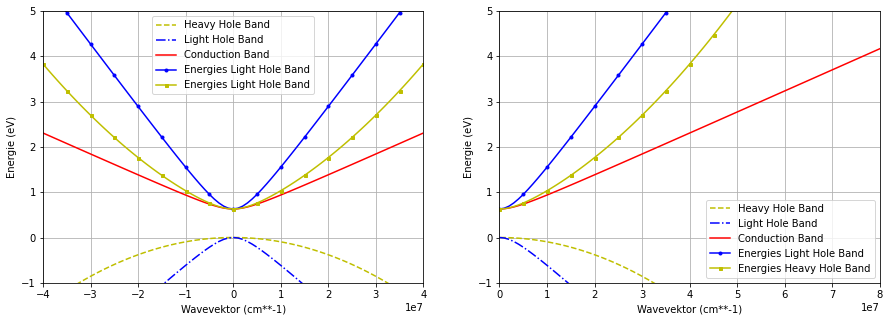

In [5]:
#Martins Doppel Resonanz Plot Bänder
#x Werte
von = -4
bis = 8
step = 0.1

k_Werte = np.arange(von, bis + step, step) * 10**7
#print(k_Werte)
#print(Conduction_Band_Energie(k_Werte))

#print(k_Werte)
#print(Conduction_Band_Energie(k_Werte))
#print(light_hole_Band_Energie(k_Werte))
#print(heavy_hole_Band_Energie(k_Werte))
#print(lh_c(k_Werte))

#Plot Bänder
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
#plt.title('Dispersion of electronic Bands')
plt.plot(k_Werte, heavy_hole_Band_Energie(k_Werte),'--', color='y'  ,markersize=3, label='Heavy Hole Band') 
plt.plot(k_Werte, light_hole_Band_Energie(k_Werte),'-.', color='b'  ,markersize=3, label='Light Hole Band') 
plt.plot(k_Werte, Conduction_Band_Energie(k_Werte), color='r'  ,markersize=3, label='Conduction Band') 

plt.plot(k_Werte,  lh_c(k_Werte),'-o', color='b'  , markevery=5, markersize=3, label='Energies Light Hole Band') 
plt.plot(k_Werte,  hh_c(k_Werte),'-s', color='y'  , markevery=5, markersize=3, label='Energies Light Hole Band') 

plt.ylim(-1, 5)
plt.xlim(-4* 10**7, 4* 10**7)
plt.xlabel('Wavevektor (cm**-1)')
plt.ylabel('Energie (eV)')
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
#plt.title('Dispersion of electronic Bands')
plt.plot(k_Werte, heavy_hole_Band_Energie(k_Werte),'--', color='y'  ,markersize=3, label='Heavy Hole Band') 
plt.plot(k_Werte, light_hole_Band_Energie(k_Werte),'-.', color='b'  ,markersize=3, label='Light Hole Band') 
plt.plot(k_Werte, Conduction_Band_Energie(k_Werte), color='r'  ,markersize=3, label='Conduction Band') 

plt.plot(k_Werte,  lh_c(k_Werte),'-o', color='b'  , markevery=5,markersize=3, label='Energies Light Hole Band') 
plt.plot(k_Werte,  hh_c(k_Werte),'-s', color='y'  , markevery=5,markersize=3, label='Energies Heavy Hole Band') 

plt.ylim(-1, 5)
plt.xlim(0, 8* 10**7)
plt.xlabel('Wavevektor (cm**-1)')
plt.ylabel('Energie (eV)')
plt.grid(True)
plt.legend()

#plt.savefig('Bilder/Dispersion_Bänder')

plt.show()



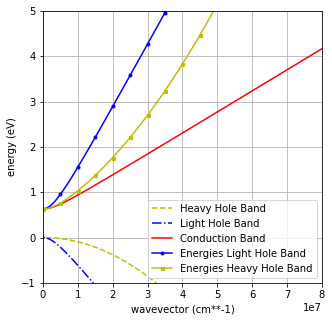

In [11]:
#Plot Bänder
fig = plt.figure(figsize=(5,5))
#plt.title('Dispersion of electronic Bands')
plt.plot(k_Werte, heavy_hole_Band_Energie(k_Werte),'--', color='y'  ,markersize=3, label='Heavy Hole Band') 
plt.plot(k_Werte, light_hole_Band_Energie(k_Werte),'-.', color='b'  ,markersize=3, label='Light Hole Band') 
plt.plot(k_Werte, Conduction_Band_Energie(k_Werte), color='r'  ,markersize=3, label='Conduction Band') 

plt.plot(k_Werte,  lh_c(k_Werte),'-o', color='b'  , markevery=5,markersize=3, label='Energies Light Hole Band') 
plt.plot(k_Werte,  hh_c(k_Werte),'-s', color='y'  , markevery=5,markersize=3, label='Energies Heavy Hole Band') 

plt.ylim(-1, 5)
plt.xlim(0, 8* 10**7)
plt.xlabel('wavevector (cm**-1)')
plt.ylabel('energy (eV)')
plt.grid(True)
plt.legend()
plt.savefig('Bilder/Dispersion_Bänder')

plt.show()


In [7]:
#Laserenergien
print("Laserwellenlänge: ", lamb, " in nm")
print("Energie Laser: ", energie_Laser(lamb), " in eV")
#Wellenvektoren
print("Wavevektor k light hole aus Grafen: ", Wavevektor_lh_graf(lamb)/(10**7), " in 10**7 * cm**-1")
print("Wavevektor k heavy hole aus Grafen: ", Wavevektor_hh_graf(lamb)/(10**7), " in 10**7 * cm**-1")
#Phononen momentum q aus grapfischem k
print("phononen Momentum q aus light hole k aus Grafen: ", phononen_momentum_graf_lh(lamb)/(10**7), " in 10**7 * cm**-1")
print("phononen Momentum q aus heavy hole k aus Grafen: ", phononen_momentum_graf_hh(lamb)/(10**7), " in 10**7 * cm**-1")
print("-------------------------------------------------------------------------------------------------------------------")
#Laserenergien
print("Laserwellenlänge: ", lamb2, " in nm")
print("Energie Laser: ", energie_Laser(lamb2), " in eV")
#Wellenvektoren
print("Wavevektor k light hole aus Grafen: ", Wavevektor_lh_graf(lamb2)/(10**7), " in 10**7 * cm**-1")
print("Wavevektor k heavy hole aus Grafen: ", Wavevektor_hh_graf(lamb2)/(10**7), " in 10**7 * cm**-1")
#Phononen momentum q aus grapfischem k
print("phononen Momentum q aus light hole k aus Grafen: ", phononen_momentum_graf_lh(lamb2)/(10**7), " in 10**7 * cm**-1")
print("phononen Momentum q aus heavy hole k aus Grafen: ", phononen_momentum_graf_hh(lamb2)/(10**7), " in 10**7 * cm**-1")

Laserwellenlänge:  266  in nm
Energie Laser:  4.661060396321409  in eV
Wavevektor k light hole aus Grafen:  3.280505247414411  in 10**7 * cm**-1
Wavevektor k heavy hole aus Grafen:  4.644554290094634  in 10**7 * cm**-1
phononen Momentum q aus light hole k aus Grafen:  6.561010494828822  in 10**7 * cm**-1
phononen Momentum q aus heavy hole k aus Grafen:  9.289108580189268  in 10**7 * cm**-1
-------------------------------------------------------------------------------------------------------------------
Laserwellenlänge:  405  in nm
Energie Laser:  3.0613384331394933  in eV
Wavevektor k light hole aus Grafen:  2.122717929895167  in 10**7 * cm**-1
Wavevektor k heavy hole aus Grafen:  3.337775007107696  in 10**7 * cm**-1
phononen Momentum q aus light hole k aus Grafen:  4.245435859790334  in 10**7 * cm**-1
phononen Momentum q aus heavy hole k aus Grafen:  6.675550014215392  in 10**7 * cm**-1


# Daten in Banddispersion nach Davydov

In [8]:
#Daten von Max
with open("./Daten//Daten von Max//Phonons.dat") as f1:
        data_Max_txt = [[cell.strip() for cell in row.split('\t')] for row in f1]     
#print(data_Max_txt) 
data_Max=np.array(data_Max_txt)

print(np.shape(data_Max))
for i in range(np.shape(data_Max)[0]):
    for j in range(np.shape(data_Max)[1]):
        if data_Max[i][j]=='':
            data_Max[i][j]='0'

#print(data_Max[3:, 1])

liste_Werte_lh_3= data_Max[3:-3, 2].astype(float) /(10**7)
liste_Werte_hh_3= data_Max[3:-3, 5].astype(float) /(10**7)

liste_Werte_lh_4= data_Max[3:-2, 2].astype(float) /(10**7)
liste_Werte_hh_4= data_Max[3:-2, 5].astype(float) /(10**7)

liste_Werte_MBE= data_Max[3:-2, 8].astype(float)
liste_Werte_MEPA= data_Max[3:-2, 9].astype(float)
liste_Werte_APlane= data_Max[3:-3, 12].astype(float)


    
print(liste_Werte_lh_3) # in (10**7) 1/cm
print(liste_Werte_hh_3) # in (10**7) 1/cm
print(liste_Werte_lh_4) # in (10**7) 1/cm
print(liste_Werte_hh_4) # in (10**7) 1/cm
print(liste_Werte_MBE) #E
print(liste_Werte_MEPA) #A
print(liste_Werte_APlane) #E



(9, 19)
[1.90173 2.62092 3.17242]
[3.31368 4.45268 5.25548]
[1.90173 2.62092 3.17242 3.73194]
[3.31368 4.45268 5.25548 6.01692]
[597.8908106  595.44093612 593.4136267  589.18749831]
[592.45588827 591.56830191 588.82304924 587.03027928]
[600.86745952 598.23491699 592.4995154 ]


[[1.35630951e+06 6.00009553e+02 6.04009553e+02]
 [3.86719894e+06 6.00117020e+02 6.04117020e+02]
 [6.18494303e+06 6.00117020e+02 6.04117020e+02]
 [8.50268712e+06 6.00117020e+02 6.04117020e+02]
 [1.08204312e+07 6.00117020e+02 6.04117020e+02]
 [1.31381753e+07 5.99902085e+02 6.03902085e+02]
 [1.54559194e+07 5.99472216e+02 6.03472216e+02]
 [1.77736635e+07 5.99257281e+02 6.03257281e+02]
 [2.00914076e+07 5.98684121e+02 6.02684121e+02]
 [2.24091517e+07 5.98397542e+02 6.02397542e+02]
 [2.47268958e+07 5.97896027e+02 6.01896027e+02]
 [2.70446399e+07 5.97537803e+02 6.01537803e+02]
 [2.93623839e+07 5.97036288e+02 6.01036288e+02]
 [3.16801280e+07 5.96319839e+02 6.00319839e+02]
 [3.39978721e+07 5.95460100e+02 5.99460100e+02]
 [3.63156162e+07 5.94743650e+02 5.98743650e+02]
 [3.86333603e+07 5.93883911e+02 5.97883911e+02]
 [4.09511044e+07 5.93095817e+02 5.97095817e+02]
 [4.32688485e+07 5.92307723e+02 5.96307723e+02]
 [4.55865926e+07 5.91519629e+02 5.95519629e+02]
 [4.79043367e+07 5.90659890e+02 5.946598

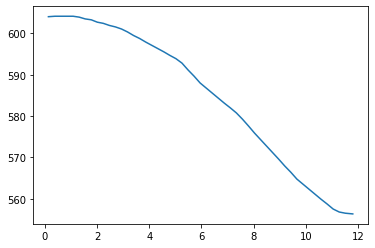

In [9]:
#daten Max zu Davydov
with open("./Daten//Daten von Max//Phonon DispREFIT.dat") as f1:
        data_Max_Davy_txt = [[cell.strip() for cell in row.split('\t')] for row in f1]
data_Max_Davy=np.array(data_Max_Davy_txt) 

for i in range(np.shape(data_Max_Davy)[0]):
    for j in range(np.shape(data_Max_Davy)[1]):
        if data_Max_Davy[i][j]=='':
            data_Max_Davy[i][j]='0'
#print(data_Max_Davy_txt)
liste_Werte_GK= data_Max_Davy[2:, 1:4].astype(float) 
liste_Werte_GM= data_Max_Davy[2:, 5:8].astype(float) 
liste_Werte_GA= data_Max_Davy[2:, 9:12].astype(float) 


#print(liste_Werte_GM)
#print(liste_Werte_GM[:,0])
#print(liste_Werte_GM[:,2:])
#plt.plot(liste_Werte_GM[:,0]/10**7,liste_Werte_GM[:,2])
#print(liste_Werte_GA)
#print(liste_Werte_GA[:,0])
#print(liste_Werte_GA[:-20,2:])
#plt.plot(liste_Werte_GA[:-20,0]/10**7,liste_Werte_GA[:-20,2])
print(liste_Werte_GK)
#print(liste_Werte_GK[:,0])
#print(liste_Werte_GK[:,2:])
plt.plot(liste_Werte_GK[:-2,0]/10**7,liste_Werte_GK[:-2,2])

[-0.0993075   0.0993075   0.29792249  0.49653748  0.69515247  0.94342122
  1.09238246  1.29099745  1.48961245  1.68822744  1.88684243  2.03580368
  2.23441867  2.43303366  2.6813024   2.97922489  3.17783988  3.32680113
  3.57506987  3.77368486  4.0219536   4.27022235  4.46883734  4.66745233
  4.86606732  5.16398981  5.36260481]
[592.10526316 592.10526316 592.10526316 592.10526316 592.10526316
 592.10526316 592.10526316 591.22807018 591.22807018 590.35087719
 590.35087719 589.47368421 588.59649123 588.59649123 588.59649123
 586.84210526 585.96491228 585.0877193  585.0877193  585.0877193
 585.0877193  583.33333333 583.33333333 583.33333333 581.57894737
 581.57894737 579.8245614 ]


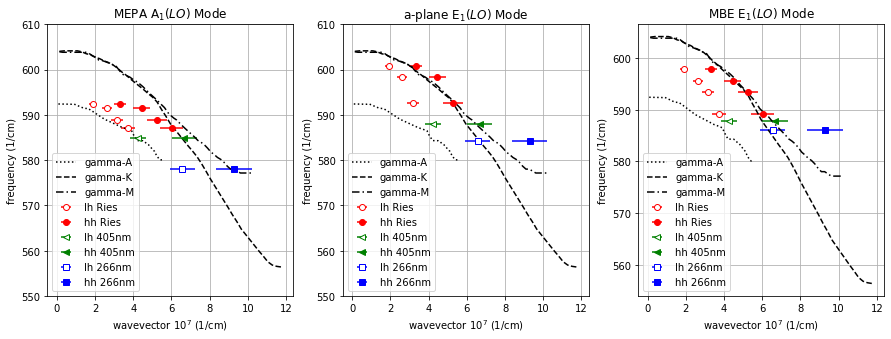

In [10]:
#Plotten Dispersionen Bänder nach richtungen in Brilloinzone
path2 = "./Daten//Auswertung_Daten_Banddispersion_Davydov//" 

x_ga,y_ga=py.loadtxt(path2+ "gamma-a_daten_Davydov.txt", unpack=True, skiprows=0)
print(x_ga)
print(y_ga)
x_gk,y_gk=py.loadtxt(path2+ "gamma-k_daten_Davydov.txt", unpack=True, skiprows=0)
x_gm,y_gm=py.loadtxt(path2+ "gamma-m_daten_Davydov.txt", unpack=True, skiprows=0)

#Verschieben Wellenzahlen um 4 für gk, gm da die Werte des papers nicht im Zentrum der Brillouinzine sind für ga -8
for a in range(len(y_ga)):
    y_ga[a]=y_ga[a]-8
    
#print(y_ga)#

for k in range(len(y_gk)):
    y_gk[k]=y_gk[k]+4
#    
for m in range(len(y_gm)):
    y_gm[m]=y_gm[m]+4
    
#Daten Laser/Peaks gewählt aus rotiert/nicht rotiert nach was besser gefittet wurde
daten_Mepa_A1LO_lh_266nm = [phononen_momentum_graf_lh(266)/(10**7), 578.1232575662078]
daten_Mepa_A1LO_hh_266nm = [phononen_momentum_graf_hh(266)/(10**7), 578.1232575662078]
daten_Mepa_A1LO_lh_405nm = [phononen_momentum_graf_lh(405)/(10**7), 584.8452513180141]
daten_Mepa_A1LO_hh_405nm = [phononen_momentum_graf_hh(405)/(10**7), 584.8452513180141]

daten_MBE_E1LO_lh_266nm = [phononen_momentum_graf_lh(266)/(10**7), 585.999303326167] 
daten_MBE_E1LO_hh_266nm = [phononen_momentum_graf_hh(266)/(10**7), 585.999303326167]
daten_MBE_E1LO_lh_405nm = [phononen_momentum_graf_lh(405)/(10**7), 587.7505068511651] 
daten_MBE_E1LO_hh_405nm = [phononen_momentum_graf_hh(405)/(10**7), 587.7505068511651]

daten_a_plane_E1LO_lh_266nm = [phononen_momentum_graf_lh(266)/(10**7), 584.3201454384281]
daten_a_plane_E1LO_hh_266nm = [phononen_momentum_graf_hh(266)/(10**7), 584.3201454384281]
daten_a_plane_E1LO_lh_405nm = [phononen_momentum_graf_lh(405)/(10**7), 588.0486642017166]
daten_a_plane_E1LO_hh_405nm = [phononen_momentum_graf_hh(405)/(10**7), 588.0486642017166]





fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('MEPA $\mathregular{A_1}(LO)$ Mode')
#plt.plot(x_ga,y_ga,':',color='black', label=("gamma-A"))
#plt.plot(x_gk,y_gk,'--',color='black', label=("gamma-K"))
#plt.plot(x_gm,y_gm,linestyle=(0, (5, 2, 1, 2)),color='black', label=("gamma-M"))
plt.plot(liste_Werte_GA[:-20,0]/10**7,liste_Werte_GA[:-20,2], ':', color='black', label=("gamma-A"))
plt.plot(liste_Werte_GK[:-2,0]/10**7,liste_Werte_GK[:-2,2], '--', color='black', label=("gamma-K"))
plt.plot(liste_Werte_GM[:,0]/10**7,liste_Werte_GM[:,2], linestyle=(0, (5, 2, 1, 2)),color='black', label=("gamma-M"))

#plt.plot(daten_Mepa_A1LO_lh_266nm[0],daten_Mepa_A1LO_lh_266nm[1],'o',color='b', markerfacecolor='w',label=("lh 266nm"))
#plt.plot(daten_Mepa_A1LO_hh_266nm[0],daten_Mepa_A1LO_hh_266nm[1], 'o', color='b' ,label=("hh 266nm"))
#plt.plot(daten_Mepa_A1LO_lh_405nm[0],daten_Mepa_A1LO_lh_405nm[1],'o',color='g', markerfacecolor='w',label=("lh 405nm"))
#plt.plot(daten_Mepa_A1LO_hh_405nm[0],daten_Mepa_A1LO_hh_405nm[1], 'o', color='g' ,label=("hh 405nm"))

#plt.plot(liste_Werte_lh_4,liste_Werte_MEPA,'o',color='r', markerfacecolor='w',label=("lh weitere Werte"))
#plt.plot(liste_Werte_hh_4,liste_Werte_MEPA,'o',color='r',label=("hh weitere Werte"))

plt.errorbar(liste_Werte_lh_4,liste_Werte_MEPA, xerr = liste_Werte_lh_4*0.1, fmt='o',color='r', markerfacecolor='w',label=("lh Ries"))
plt.errorbar(liste_Werte_hh_4,liste_Werte_MEPA, xerr = liste_Werte_hh_4*0.1, fmt='o',color='r',label=("hh Ries"))
plt.errorbar(daten_Mepa_A1LO_lh_405nm[0],daten_Mepa_A1LO_lh_405nm[1], xerr = daten_Mepa_A1LO_lh_405nm[0]*0.1, fmt='<',color='g', markerfacecolor='w',label=("lh 405nm"))
plt.errorbar(daten_Mepa_A1LO_hh_405nm[0],daten_Mepa_A1LO_hh_405nm[1], xerr = daten_Mepa_A1LO_hh_405nm[0]*0.1, fmt='<', color='g' ,label=("hh 405nm"))
plt.errorbar(daten_Mepa_A1LO_lh_266nm[0],daten_Mepa_A1LO_lh_266nm[1], xerr = daten_Mepa_A1LO_lh_266nm[0]*0.1, fmt='s',color='b', markerfacecolor='w',label=("lh 266nm"))
plt.errorbar(daten_Mepa_A1LO_hh_266nm[0],daten_Mepa_A1LO_hh_266nm[1], xerr = daten_Mepa_A1LO_hh_266nm[0]*0.1, fmt='s', color='b' ,label=("hh 266nm"))

plt.xlabel('wavevector $\mathregular{10^7}$ (1/cm)')
plt.ylabel('frequency (1/cm)')
plt.ylim(550,610)
plt.legend()
plt.grid(True)


plt.subplot(1, 3, 2)
plt.title('a-plane $\mathregular{E_1}(LO)$ Mode')
#plt.plot(x_ga,y_ga,':',color='black', label=("gamma-A"))
#plt.plot(x_gk,y_gk,'--',color='black', label=("gamma-K"))
#plt.plot(x_gm,y_gm,linestyle=(0, (5, 2, 1, 2)),color='black', label=("gamma-M"))
plt.plot(liste_Werte_GA[:-20,0]/10**7,liste_Werte_GA[:-20,2], ':', color='black', label=("gamma-A"))
plt.plot(liste_Werte_GK[:-2,0]/10**7,liste_Werte_GK[:-2,2], '--', color='black', label=("gamma-K"))
plt.plot(liste_Werte_GM[:,0]/10**7,liste_Werte_GM[:,2], linestyle=(0, (5, 2, 1, 2)),color='black', label=("gamma-M"))

#plt.plot(daten_a_plane_E1LO_lh_266nm[0],daten_a_plane_E1LO_lh_266nm[1],'o',color='b', markerfacecolor='w',label=("lh 266nm"))
#plt.plot(daten_a_plane_E1LO_hh_266nm[0],daten_a_plane_E1LO_hh_266nm[1], 'o', color='b' ,label=("hh 266nm"))
#plt.plot(daten_a_plane_E1LO_lh_405nm[0],daten_a_plane_E1LO_lh_405nm[1],'o',color='g', markerfacecolor='w',label=("lh 405nm"))
#plt.plot(daten_a_plane_E1LO_hh_405nm[0],daten_a_plane_E1LO_hh_405nm[1], 'o', color='g' ,label=("hh 405nm"))

#plt.plot(liste_Werte_lh_3,liste_Werte_APlane,'o',color='r', markerfacecolor='w',label=("lh weitere Werte"))
#plt.plot(liste_Werte_hh_3,liste_Werte_APlane,'o',color='r',label=("hh weitere Werte"))

plt.errorbar(liste_Werte_lh_3,liste_Werte_APlane, xerr = liste_Werte_lh_3*0.1, fmt='o',color='r', markerfacecolor='w',label=("lh Ries"))
plt.errorbar(liste_Werte_hh_3,liste_Werte_APlane, xerr = liste_Werte_hh_3*0.1, fmt='o',color='r',label=("hh Ries"))
plt.errorbar(daten_a_plane_E1LO_lh_405nm[0],daten_a_plane_E1LO_lh_405nm[1], xerr = daten_a_plane_E1LO_lh_405nm[0]*0.1, fmt='<',color='g', markerfacecolor='w',label=("lh 405nm"))
plt.errorbar(daten_a_plane_E1LO_hh_405nm[0],daten_a_plane_E1LO_hh_405nm[1], xerr = daten_a_plane_E1LO_hh_405nm[0]*0.1, fmt='<', color='g' ,label=("hh 405nm"))
plt.errorbar(daten_a_plane_E1LO_lh_266nm[0],daten_a_plane_E1LO_lh_266nm[1], xerr = daten_a_plane_E1LO_lh_266nm[0]*0.1, fmt='s',color='b', markerfacecolor='w',label=("lh 266nm"))
plt.errorbar(daten_a_plane_E1LO_hh_266nm[0],daten_a_plane_E1LO_hh_266nm[1], xerr = daten_a_plane_E1LO_hh_266nm[0]*0.1, fmt='s', color='b' ,label=("hh 266nm"))

plt.xlabel('wavevector $\mathregular{10^7}$ (1/cm)')
plt.ylabel('frequency (1/cm)')
plt.ylim(550,610)
plt.legend()
plt.grid(True)


plt.subplot(1, 3, 3)
plt.title('MBE $\mathregular{E_1}(LO)$ Mode')
#plt.plot(x_ga,y_ga,':',color='black', label=("gamma-A"))
#plt.plot(x_gk,y_gk,'--',color='black', label=("gamma-K"))
#plt.plot(x_gm,y_gm,linestyle=(0, (5, 2, 1, 2)),color='black', label=("gamma-M"))
plt.plot(liste_Werte_GA[:-20,0]/10**7,liste_Werte_GA[:-20,2], ':', color='black', label=("gamma-A"))
plt.plot(liste_Werte_GK[:-2,0]/10**7,liste_Werte_GK[:-2,2], '--', color='black', label=("gamma-K"))
plt.plot(liste_Werte_GM[:,0]/10**7,liste_Werte_GM[:,2], linestyle=(0, (5, 2, 1, 2)),color='black', label=("gamma-M"))

#plt.plot(daten_MBE_E1LO_lh_266nm[0],daten_MBE_E1LO_lh_266nm[1],'o',color='b', markerfacecolor='w',label=("lh 266nm"))
#plt.plot(daten_MBE_E1LO_hh_266nm[0],daten_MBE_E1LO_hh_266nm[1], 'o', color='b' ,label=("hh 266nm"))
#plt.plot(daten_MBE_E1LO_lh_405nm[0],daten_MBE_E1LO_lh_405nm[1],'o',color='g', markerfacecolor='w',label=("lh 405nm"))
#plt.plot(daten_MBE_E1LO_hh_405nm[0],daten_MBE_E1LO_hh_405nm[1], 'o', color='g' ,label=("hh 405nm"))

#plt.plot(liste_Werte_lh_4,liste_Werte_MBE,'o',color='r', markerfacecolor='w',label=("lh weitere Werte"))
#plt.plot(liste_Werte_hh_4,liste_Werte_MBE,'o',color='r',label=("hh weitere Werte"))

plt.errorbar(liste_Werte_lh_4,liste_Werte_MBE, xerr = liste_Werte_lh_4*0.1, fmt='o',color='r', markerfacecolor='w',label=("lh Ries"))
plt.errorbar(liste_Werte_hh_4,liste_Werte_MBE, xerr = liste_Werte_hh_4*0.1, fmt='o',color='r',label=("hh Ries"))
plt.errorbar(daten_MBE_E1LO_lh_405nm[0],daten_MBE_E1LO_lh_405nm[1], xerr = daten_MBE_E1LO_lh_405nm[0]*0.1, fmt='<',color='g', markerfacecolor='w',label=("lh 405nm"))
plt.errorbar(daten_MBE_E1LO_hh_405nm[0],daten_MBE_E1LO_hh_405nm[1], xerr = daten_MBE_E1LO_hh_405nm[0]*0.1, fmt='<', color='g' ,label=("hh 405nm"))
plt.errorbar(daten_MBE_E1LO_lh_266nm[0],daten_MBE_E1LO_lh_266nm[1], xerr = daten_MBE_E1LO_lh_266nm[0]*0.1, fmt='s',color='b', markerfacecolor='w',label=("lh 266nm"))
plt.errorbar(daten_MBE_E1LO_hh_266nm[0],daten_MBE_E1LO_hh_266nm[1], xerr = daten_MBE_E1LO_hh_266nm[0]*0.1, fmt='s', color='b' ,label=("hh 266nm"))

plt.xlabel('wavevector $\mathregular{10^7}$ (1/cm)')
plt.ylabel('frequency (1/cm)')
plt.legend()
plt.grid(True)

plt.savefig('Bilder/Dispersion_LO_Moden')
plt.show()

#fig.savefig('LO Phononen 266,405nm doppelresonanz.png')